In [7]:
import h5py
filename = "./data/CollabExp2_2022-03-17T205249Z.h5"


In [8]:
# Quick check: list top-level groups in the HDF5 file
import h5py
with h5py.File(filename, 'r') as f:
    print("Top-level keys:", list(f.keys()))

Top-level keys: ['Acquisition']


In [9]:
# Inspect contents under the 'Acquisition' group
import h5py
with h5py.File(filename,'r') as f:
    grp = f['Acquisition']
    print("Keys under 'Acquisition':", list(grp.keys()))
    for name, obj in grp.items():
        kind = 'Dataset' if isinstance(obj, h5py.Dataset) else 'Group'
        extra = f", shape={obj.shape}, dtype={obj.dtype}" if isinstance(obj, h5py.Dataset) else ""
        print(f"{name}: {kind}{extra}")

Keys under 'Acquisition': ['Custom', 'Raw[0]']
Custom: Group
Raw[0]: Group


In [ ]:
with h5py.File(filename, 'r') as f:
    # Function to recursively print groups and datasets
    def print_hdf5_item(name, obj):
        if isinstance(obj, h5py.Group):
            print(f"Group : {name}")
        elif isinstance(obj, h5py.Dataset):
            print(f"Dataset : {name}")
    # Visit all items (groups and datasets) in the file
    f.visititems(print_hdf5_item)

Group : Acquisition
Group : Acquisition/Custom
Group : Acquisition/Raw[0]
Group : Acquisition/Raw[0]/Custom
Dataset : Acquisition/Raw[0]/Custom/GpBits
Dataset : Acquisition/Raw[0]/Custom/GpsStatus
Dataset : Acquisition/Raw[0]/Custom/PpsOffset
Dataset : Acquisition/Raw[0]/Custom/SampleCount
Dataset : Acquisition/Raw[0]/RawData
Dataset : Acquisition/Raw[0]/RawDataTime


In [11]:
import numpy as np

def print_h5_tree(h5obj, indent=0):
    """Recursively print HDF5 structure (groups/datasets + shapes/dtypes)."""
    pad = "  " * indent
    for key in h5obj.keys():
        item = h5obj[key]
        if isinstance(item, h5py.Dataset):
            print(f"{pad}- {key}  [DATASET] shape={item.shape}, dtype={item.dtype}")
        else:
            print(f"{pad}- {key}  [GROUP]")
            print_h5_tree(item, indent + 1)

with h5py.File(filename, "r") as f:
    print("== HDF5 FILE TREE ==")
    print_h5_tree(f)

    print("\n== FILE ATTRIBUTES ==")
    for k, v in f.attrs.items():
        print(f"{k}: {v}")

    # Example: read a dataset once you know its path
    # dataset_path = "/group1/datasetA"   # <-- update after seeing the tree
    # data = f[dataset_path][...]         # loads full dataset into memory
    # print("Loaded:", dataset_path, data.shape, data.dtype)


== HDF5 FILE TREE ==
- Acquisition  [GROUP]
  - Custom  [GROUP]
  - Raw[0]  [GROUP]
    - Custom  [GROUP]
      - GpBits  [DATASET] shape=(12000,), dtype=uint8
      - GpsStatus  [DATASET] shape=(12000,), dtype=uint8
      - PpsOffset  [DATASET] shape=(12000,), dtype=uint32
      - SampleCount  [DATASET] shape=(12000,), dtype=int64
    - RawData  [DATASET] shape=(12000, 776), dtype=int32
    - RawDataTime  [DATASET] shape=(12000,), dtype=int64

== FILE ATTRIBUTES ==
uuid: b'5bd473e4-f710-4828-98f9-a24259939301'


# visualize

In [20]:
# shape

with h5py.File(filename, "r") as f:
    raw = f["Acquisition/Raw[0]/RawData"][:]        # (12000, 776)
    time = f["Acquisition/Raw[0]/RawDataTime"][:]  # (12000,)

print("RawData shape:", raw.shape)
print("Time shape:", time.shape)

RawData shape: (12000, 776)
Time shape: (12000,)


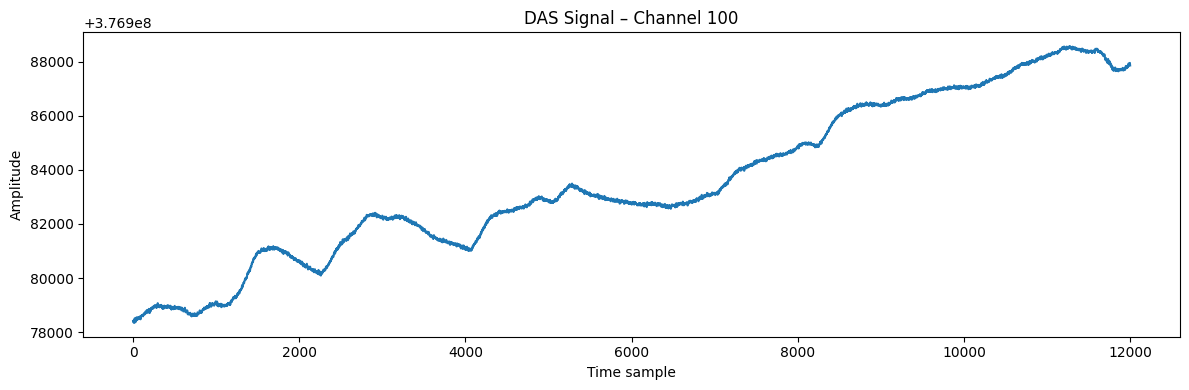

In [25]:
# amplitude plot for one channel

import matplotlib.pyplot as plt

channel_id = 100  # choose 0–775

plt.figure(figsize=(12, 4))
plt.plot(raw[:, channel_id])
plt.xlabel("Time sample")
plt.ylabel("Amplitude")
plt.title(f"DAS Signal – Channel {channel_id}")
plt.tight_layout()
plt.show()


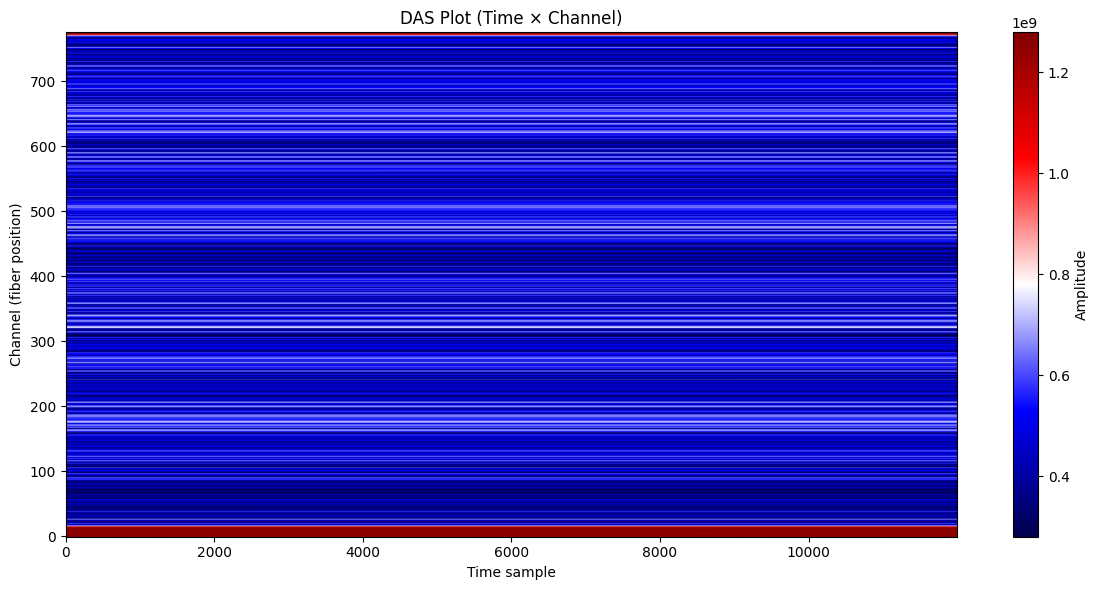

In [28]:
plt.figure(figsize=(12, 6))
plt.imshow(
    raw.T,
    aspect="auto",
    origin="lower",
    cmap="seismic"
)
plt.colorbar(label="Amplitude")
plt.xlabel("Time sample")
plt.ylabel("Channel (fiber position)")
plt.title("DAS Plot (Time × Channel)")
plt.tight_layout()
plt.show()
